In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-nzggpb_e because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [11]:
d2_me = pd.read_csv('../output/d_deg.out',delim_whitespace=True,names=['y','a','z','THETA','EP','x','sigdis_new','sig_qe_new'],dtype={'y':np.float64,'a':np.float64,'z':np.float64,'THETA':np.float64,'EP':np.float64,'x':np.float64,'sigdis_new':np.float64,'sig_qe_new':np.float64})
d2_nadia = pd.read_csv('../output/fort.14',delim_whitespace=True,names=['y','a','z','THETA','EP','x','sigdis_new','sig_qe_new'],dtype={'y':np.float64,'a':np.float64,'z':np.float64,'THETA':np.float64,'EP':np.float64,'x':np.float64,'sigdis_new':np.float64,'sig_qe_new':np.float64})

d2_me['sig_qe_new'] = d2_me['sig_qe_new'] * 1000000.
d2_nadia['sig_qe_new'] = d2_nadia['sig_qe_new'] * 1000000.
d2_me['BORN_CS'] = d2_me['sig_qe_new'] + d2_me['sigdis_new']
d2_nadia['BORN_CS'] = d2_me['sig_qe_new'] + d2_me['sigdis_new']

comparison = d2_me
comparison['y_comp'] = (d2_me['y'] - d2_nadia['y']) / d2_me['y'] * 100.
comparison['a_comp'] = (d2_me['a'] - d2_nadia['a']) / d2_me['a'] * 100.
comparison['z_comp'] = (d2_me['z'] - d2_nadia['z']) / d2_me['z'] * 100.
comparison['THETA_comp'] = (d2_me['THETA'] - d2_nadia['THETA']) / d2_me['THETA'] * 100.
comparison['EP_comp'] = (d2_me['EP'] - d2_nadia['EP']) / d2_me['EP'] * 100.
comparison['x_comp'] = (d2_me['x'] - d2_nadia['x']) / d2_me['x'] * 100.
comparison['sigdis_new_comp'] = (d2_me['sigdis_new'] - d2_nadia['sigdis_new']) / d2_me['sigdis_new'] * 100.
comparison['sig_qe_new_comp'] = (d2_me['sig_qe_new'] - d2_nadia['sig_qe_new']) / d2_me['sig_qe_new'] * 100.


<AxesSubplot:xlabel='x', ylabel='sig_qe_new_comp'>

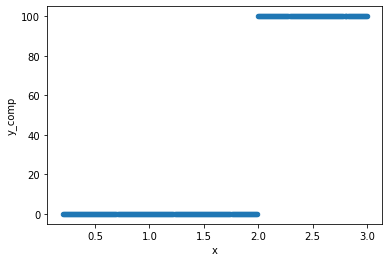

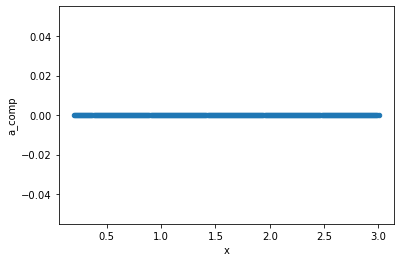

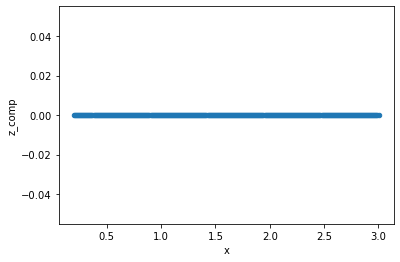

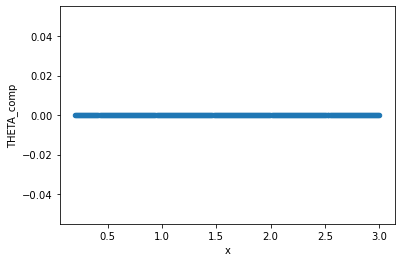

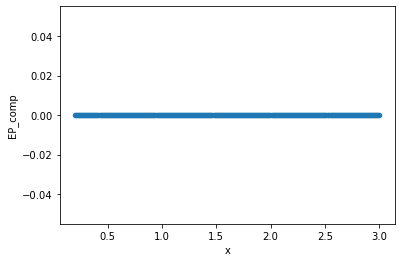

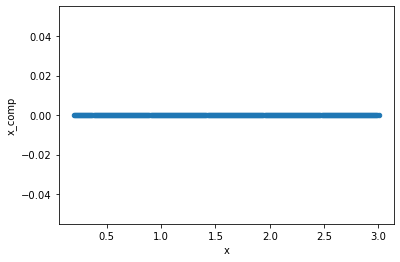

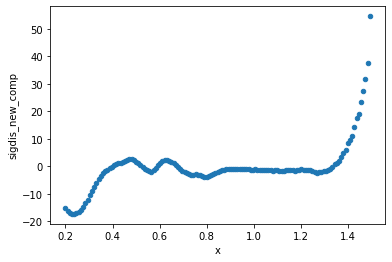

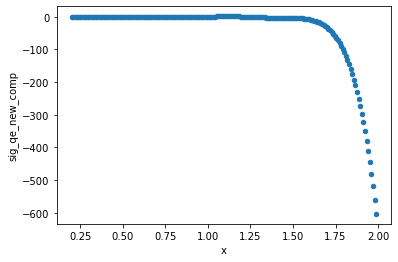

In [12]:
def mask(df, key, value):
    return df[df[key] == value]
pd.DataFrame.mask = mask

comp = comparison.mask('THETA',8.0000)
def mask(df, key, value):
    return df[df[key] >= value]
pd.DataFrame.mask = mask

#comp2 = comp.mask('x',1.0000)

comp.plot.scatter('x','y_comp')
comp.plot.scatter('x','a_comp')
comp.plot.scatter('x','z_comp')
comp.plot.scatter('x','THETA_comp')
comp.plot.scatter('x','EP_comp')
comp.plot.scatter('x','x_comp')
comp.plot.scatter('x','sigdis_new_comp')
comp.plot.scatter('x','sig_qe_new_comp')

In [13]:
print(comp['THETA'])

3600    8.0
3601    8.0
3602    8.0
3603    8.0
3604    8.0
       ... 
3895    8.0
3896    8.0
3897    8.0
3898    8.0
3899    8.0
Name: THETA, Length: 300, dtype: float64


<AxesSubplot:xlabel='x', ylabel='sig_qe_new'>

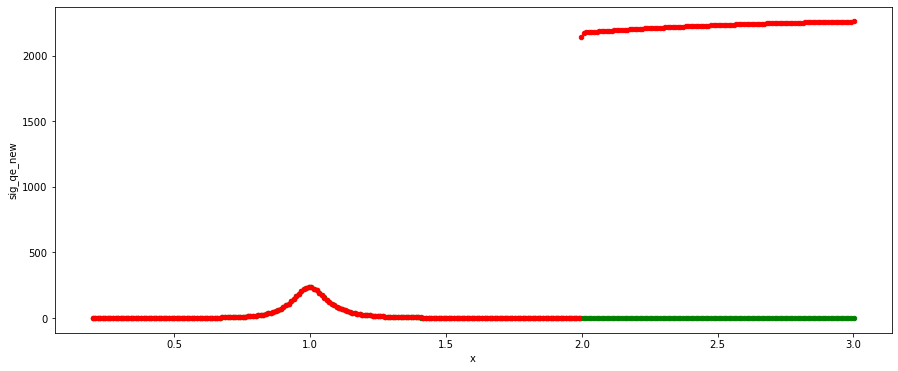

In [14]:
fig, ax1 = plt.subplots(1,1,figsize=(15, 6))

def mask(df, key, value):
    return df[df[key] == value]
pd.DataFrame.mask = mask

d2_me_8deg = d2_me.mask('THETA',8.)
d2_nadia_8deg = d2_nadia.mask('THETA',8.)

#d2_me_8deg.plot.scatter('x','sigdis_new',c='red',ax=ax1)
#d2_nadia_8deg.plot.scatter('x','sigdis_new',c='tab:red',ax=ax1)
d2_me_8deg.plot.scatter('x','sig_qe_new',c='green',ax=ax1)
d2_nadia_8deg.plot.scatter('x','sig_qe_new',c='red',ax=ax1)
#d2_me_8deg.plot.scatter('x','BORN_CS',c='tab:red',ax=ax1)
#d2_nadia_8deg.plot.scatter('x','BORN_CS',c='tab:green',ax=ax1,ylim=(1.75e-3,0.75e3),xlim=(1,1.4),logy=False)